In [22]:
import os
import numpy as np

In [3]:
DATAPATH = "./data/photon"

In [78]:
files = []

for (dirpath, dirnames, filenames) in os.walk(DATAPATH):
    for filename in filenames:
        if filename.endswith('.txt'): 
            files.append(os.sep.join([dirpath, filename]))

In [87]:
timeDict = {}

with open(DATAPATH+'/time.txt') as fp:
    for line in fp:
        val = line.strip().split(',')
        timeDict[val[0]+val[1]] = (int(val[2]), int(val[3]))

In [246]:
def getAvg(fname):
#     print(fname)
    power = np.array([],dtype=float)
    timestamp = np.array([],dtype=int)

    with open(fname) as fp:
        next(fp)
        next(fp)
        for line in fp:
            if "You" in line:
                break
#             print(line.strip().split(',')[5])
#             power += line.strip().split(',')[5]
            power = np.append(power, [float(line.strip().split(',')[5])])
            timestamp = np.append(timestamp, [float(line.strip().split(',')[1])*1000])
        
    temp = fname.strip('.txt').split('_')
    print temp
    if "full" in fname:
        print("here")
        time = timeDict[temp[1]+temp[2]][1]
    else:
        time = timeDict[temp[1]+temp[2]][0]
        
    idx = (np.abs(timestamp - time)).argmin()
#     return time
    return (np.average(power[200:idx])*(time-200))
#     print(power)
#     print(timestamp)
#     print(idx, timestamp[idx])

In [247]:
a,b = getAvg('./data/photon/photon_30_40_full.txt'), getAvg('./data/photon/photon_30_40.txt')
a,b

['/data/photon/photon', '30', '40', 'full']
here
['/data/photon/photon', '30', '40']


(11097.732917243879, 9347.058449432681)

In [248]:
def genPwr(num):
    sparse_arr, full_arr = [], []
    for f in [30,40,50,60]:
        fstr = './data/photon/photon_' + str(num) + '_' + str(f)
        sparse_arr.append(getAvg(fstr+".txt"))
        full_arr.append(getAvg(fstr+"_full.txt"))
    return sparse_arr, full_arr

In [249]:
genPwr(10)

['/data/photon/photon', '10', '30']
['/data/photon/photon', '10', '30', 'full']
here
['/data/photon/photon', '10', '40']
['/data/photon/photon', '10', '40', 'full']
here
['/data/photon/photon', '10', '50']
['/data/photon/photon', '10', '50', 'full']
here
['/data/photon/photon', '10', '60']
['/data/photon/photon', '10', '60', 'full']
here


([3450.3853298941544, 3182.2277142343332, nan, nan],
 [3872.232003255884,
  3697.7182629033446,
  3589.970850355103,
  3412.9492172335144])

In [250]:
import matplotlib.pyplot as plt

def chartData(a, b):
    ind = np.arange(4)  # the x locations for the groups
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind - width/2, a, width,color='SkyBlue', label='Sparse')
    rects2 = ax.bar(ind + width/2, b, width,color='IndianRed', label='Full')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(ind)
    ax.set_xticklabels(('30', '40', '50', '60'))
    ax.legend()
    plt.show()
    
def chart2(a, b):
    objects = ('30', '40', '50', '60')
    y_pos = np.arange(4)
    performance = ((np.array(b) - np.array(a))/np.array(b))*100.0
 
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Usage')
    plt.title('Programming language usage')
 
    plt.show()

['/data/photon/photon', '10', '30']
['/data/photon/photon', '10', '30', 'full']
here
['/data/photon/photon', '10', '40']
['/data/photon/photon', '10', '40', 'full']
here
['/data/photon/photon', '10', '50']
['/data/photon/photon', '10', '50', 'full']
here
['/data/photon/photon', '10', '60']
['/data/photon/photon', '10', '60', 'full']
here


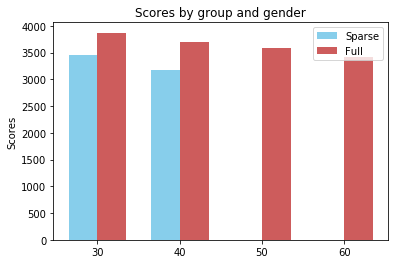

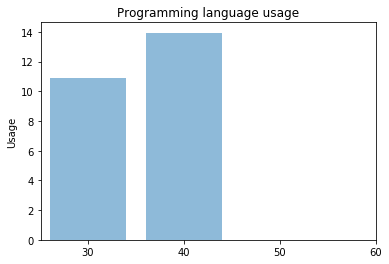

([3450.3853298941544, 3182.2277142343332, nan, nan],
 [3872.232003255884,
  3697.7182629033446,
  3589.970850355103,
  3412.9492172335144])

In [251]:
a,b = genPwr(10)
chartData(a,b)
chart2(a, b)
a,b

['/data/photon/photon', '20', '30']
['/data/photon/photon', '20', '30', 'full']
here
['/data/photon/photon', '20', '40']
['/data/photon/photon', '20', '40', 'full']
here
['/data/photon/photon', '20', '50']
['/data/photon/photon', '20', '50', 'full']
here
['/data/photon/photon', '20', '60']
['/data/photon/photon', '20', '60', 'full']
here


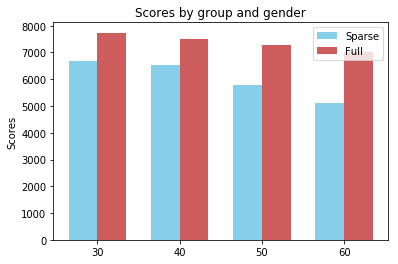

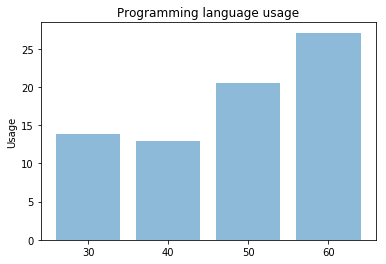

In [252]:
a,b = genPwr(20)
chartData(a,b)
chart2(a, b)

['/data/photon/photon', '30', '30']
['/data/photon/photon', '30', '30', 'full']
here
['/data/photon/photon', '30', '40']
['/data/photon/photon', '30', '40', 'full']
here
['/data/photon/photon', '30', '50']
['/data/photon/photon', '30', '50', 'full']
here
['/data/photon/photon', '30', '60']
['/data/photon/photon', '30', '60', 'full']
here


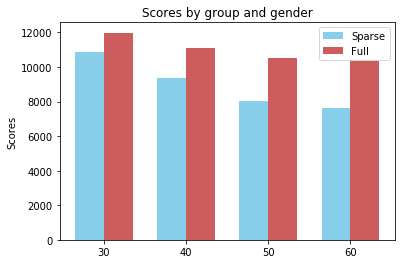

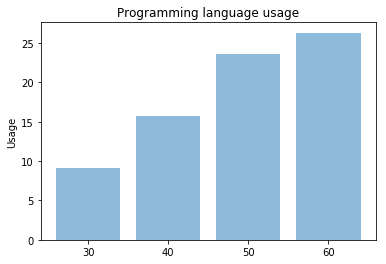

In [253]:
a,b = genPwr(30)
chartData(a,b)
chart2(a, b)

['/data/photon/photon', '40', '30']
['/data/photon/photon', '40', '30', 'full']
here
['/data/photon/photon', '40', '40']
['/data/photon/photon', '40', '40', 'full']
here
['/data/photon/photon', '40', '50']
['/data/photon/photon', '40', '50', 'full']
here
['/data/photon/photon', '40', '60']
['/data/photon/photon', '40', '60', 'full']
here


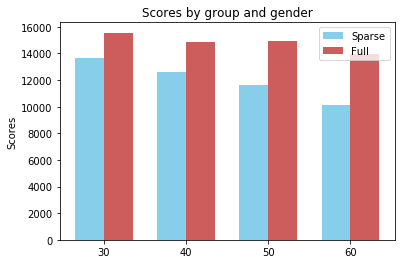

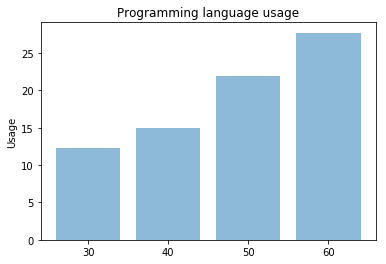

In [254]:
a,b = genPwr(40)
chartData(a,b)
chart2(a, b)

['/data/photon/photon', '50', '30']
['/data/photon/photon', '50', '30', 'full']
here
['/data/photon/photon', '50', '40']
['/data/photon/photon', '50', '40', 'full']
here
['/data/photon/photon', '50', '50']
['/data/photon/photon', '50', '50', 'full']
here
['/data/photon/photon', '50', '60']
['/data/photon/photon', '50', '60', 'full']
here


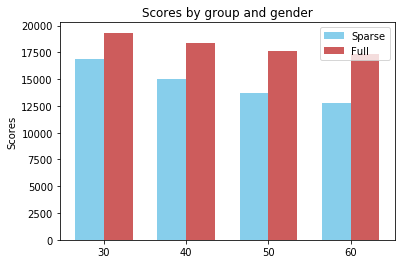

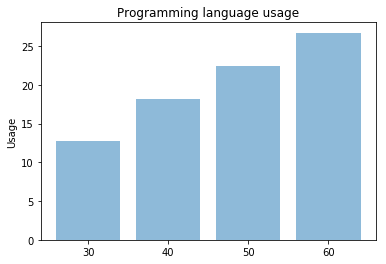

In [255]:
a,b = genPwr(50)
chartData(a,b)
chart2(a, b)

['/data/photon/photon', '60', '30']
['/data/photon/photon', '60', '30', 'full']
here
['/data/photon/photon', '60', '40']
['/data/photon/photon', '60', '40', 'full']
here
['/data/photon/photon', '60', '50']
['/data/photon/photon', '60', '50', 'full']
here
['/data/photon/photon', '60', '60']
['/data/photon/photon', '60', '60', 'full']
here


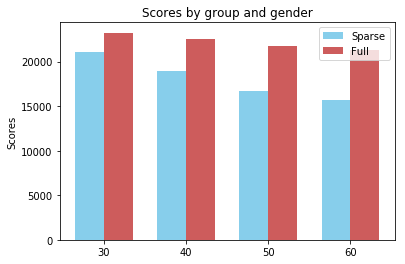

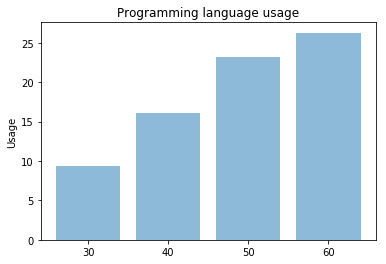

In [256]:
a,b = genPwr(60)
chartData(a,b)
chart2(a, b)

['/data/photon/photon', '70', '30']
['/data/photon/photon', '70', '30', 'full']
here
['/data/photon/photon', '70', '40']
['/data/photon/photon', '70', '40', 'full']
here
['/data/photon/photon', '70', '50']
['/data/photon/photon', '70', '50', 'full']
here
['/data/photon/photon', '70', '60']
['/data/photon/photon', '70', '60', 'full']
here


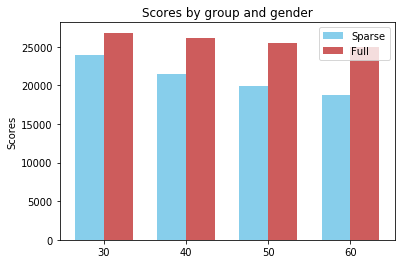

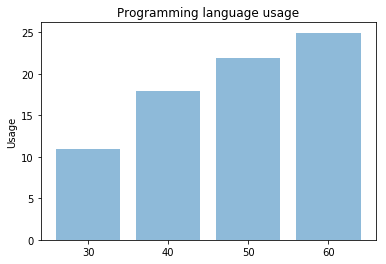

In [257]:
a,b = genPwr(70)
chartData(a,b)
chart2(a, b)

['/data/photon/photon', '80', '30']
['/data/photon/photon', '80', '30', 'full']
here
['/data/photon/photon', '80', '40']
['/data/photon/photon', '80', '40', 'full']
here
['/data/photon/photon', '80', '50']
['/data/photon/photon', '80', '50', 'full']
here
['/data/photon/photon', '80', '60']
['/data/photon/photon', '80', '60', 'full']
here


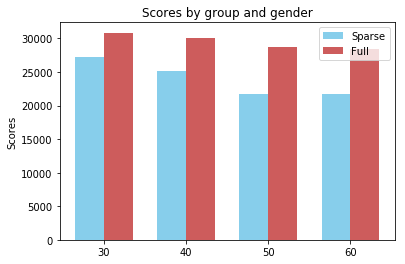

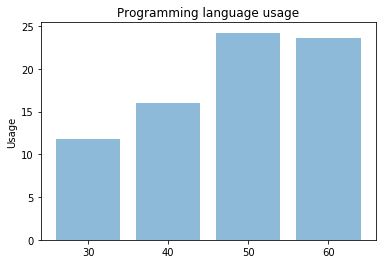

In [258]:
a,b = genPwr(80)
chartData(a,b)
chart2(a, b)

['/data/photon/photon', '90', '30']
['/data/photon/photon', '90', '30', 'full']
here
['/data/photon/photon', '90', '40']
['/data/photon/photon', '90', '40', 'full']
here
['/data/photon/photon', '90', '50']
['/data/photon/photon', '90', '50', 'full']
here
['/data/photon/photon', '90', '60']
['/data/photon/photon', '90', '60', 'full']
here


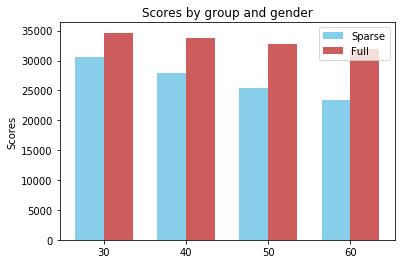

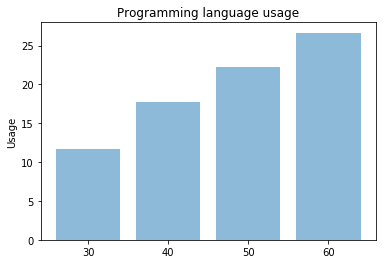

In [259]:
a,b = genPwr(90)
chartData(a,b)
chart2(a, b)

['/data/photon/photon', '100', '30']
['/data/photon/photon', '100', '30', 'full']
here
['/data/photon/photon', '100', '40']
['/data/photon/photon', '100', '40', 'full']
here
['/data/photon/photon', '100', '50']
['/data/photon/photon', '100', '50', 'full']
here
['/data/photon/photon', '100', '60']
['/data/photon/photon', '100', '60', 'full']
here


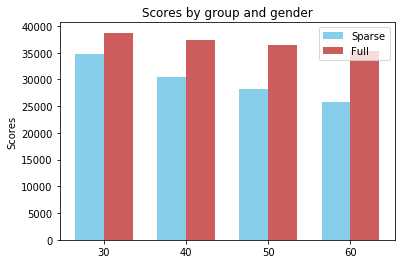

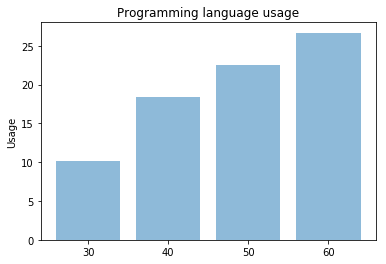

In [260]:
a,b = genPwr(100)
chartData(a,b)
chart2(a, b)